# 1.数据导入

从 UCI 网站（http://archive.ics.uci.edu/ml/index.php）下载 Breast Cancer Wisconsin 数据集(数据index.data)，并用read_table实现数据的读取，数据集分别逗号为分隔符。

In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing,metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve ,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
dataset=pd.read_table(r'C:\Users\hp\Desktop\机器学习\breast-cancer-wisconsin.data',sep=',')

# 2.数据描述

对 Breast Cancer Wisconsin 数据集进行数据描述，包括样本数、特征数、特征信息、类别信息等。我们首先输出data_info内的内容，确定样本量为699条，一列为ID，一列为Label（诊断结果，Diagnosis），其余列为Feature（对Feature的介绍并不全面，只有部分说明）。接下来，由于data数据集中没有列名，所以默认将第一行作为列名，但是第一行是实际的样本数据，所以我们要将读取文件时被作为列名的数据加入到数据集中，同时修改列名。最后输出数据集的各种信息，确认数据处理成功。

In [16]:
dataset.info

<bound method DataFrame.info of      1000025  5   1  1.1  1.2  2 1.3   3  1.4  1.5  2.1
0    1002945  5   4    4    5  7  10   3    2    1    2
1    1015425  3   1    1    1  2   2   3    1    1    2
2    1016277  6   8    8    1  3   4   3    7    1    2
3    1017023  4   1    1    3  2   1   3    1    1    2
4    1017122  8  10   10    8  7  10   9    7    1    4
..       ... ..  ..  ...  ... ..  ..  ..  ...  ...  ...
693   776715  3   1    1    1  3   2   1    1    1    2
694   841769  2   1    1    1  2   1   1    1    1    2
695   888820  5  10   10    3  7   3   8   10    2    4
696   897471  4   8    6    4  3   4  10    6    1    4
697   897471  4   8    8    5  4   5  10    4    1    4

[698 rows x 11 columns]>

In [17]:
dataset.loc[dataset.shape[0]]=dataset.columns#将被作为列名的数据添加到样本集中
feature_number_int=range(1,10)
feature_number=[]
for i in range(len(feature_number_int)):
    feature_number.append("Feature"+str(feature_number_int[i]) )#新列名
dataset.columns=['ID']+feature_number+['Diagnosis']
print(dataset)

          ID Feature1 Feature2 Feature3 Feature4 Feature5 Feature6 Feature7  \
0    1002945        5        4        4        5        7       10        3   
1    1015425        3        1        1        1        2        2        3   
2    1016277        6        8        8        1        3        4        3   
3    1017023        4        1        1        3        2        1        3   
4    1017122        8       10       10        8        7       10        9   
..       ...      ...      ...      ...      ...      ...      ...      ...   
694   841769        2        1        1        1        2        1        1   
695   888820        5       10       10        3        7        3        8   
696   897471        4        8        6        4        3        4       10   
697   897471        4        8        8        5        4        5       10   
698  1000025        5        1      1.1      1.2        2      1.3        3   

    Feature8 Feature9 Diagnosis  
0          2     

# 3.缺失值处理

使用isnull()函数发现各列并没有缺失值，但是事实并非如此，因为我们发现在对数据格式进行强制转换时有的数据并没有转换成功，发现是对应数据为问号，这同样需要当成缺失值处理。同时我们需要把标签值处理为0、1而非2、4

In [18]:
dataset.isnull().any()
print(dataset.isnull().any())

ID           False
Feature1     False
Feature2     False
Feature3     False
Feature4     False
Feature5     False
Feature6     False
Feature7     False
Feature8     False
Feature9     False
Diagnosis    False
dtype: bool


In [19]:
for i in range(dataset.shape[0]):
    if dataset.iloc[i,6]=="?":
        dataset.iloc[i,6]=np.nan
dataset.dropna(axis=0,inplace=True)
for i in range(dataset.shape[1]):
    dataset.iloc[:,i].astype(float)

In [20]:
dataset.info

<bound method DataFrame.info of           ID Feature1 Feature2 Feature3 Feature4 Feature5 Feature6 Feature7  \
0    1002945        5        4        4        5        7       10        3   
1    1015425        3        1        1        1        2        2        3   
2    1016277        6        8        8        1        3        4        3   
3    1017023        4        1        1        3        2        1        3   
4    1017122        8       10       10        8        7       10        9   
..       ...      ...      ...      ...      ...      ...      ...      ...   
694   841769        2        1        1        1        2        1        1   
695   888820        5       10       10        3        7        3        8   
696   897471        4        8        6        4        3        4       10   
697   897471        4        8        8        5        4        5       10   
698  1000025        5        1      1.1      1.2        2      1.3        3   

    Feature8 Featur

# 4.数据标准化

In [21]:
standard_dataset = preprocessing.scale(dataset.iloc[:,1:10])
dataset.iloc[:,1:10]=standard_dataset
dataset.iloc[dataset['Diagnosis']==2,10]=0
dataset.iloc[dataset['Diagnosis']==4,10]=1
dataset.iloc[682,10]=0#这个样本标签值为2.1

# 5.构造训练集与测试集

## 5.1 留出法（hold-out）

In [22]:
feature,label=dataset.iloc[:,1:10],dataset.iloc[:,10]
ho_fea_train,ho_fea_test,ho_label_train,ho_label_test=train_test_split(feature,label,test_size=0.3, train_size=0.7)

## 5.2 K折交叉验证（K-fold）

In [42]:
kf = KFold(n_splits=5)
for kf_train, kf_test in kf.split(dataset):
    print("%s %s" % (kf_train, kf_test))

1
[137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 

# 6.模型训练与性能度量

## 6.1 Logistic Regression

训练的混淆矩阵为
[[137   2]
 [  5  61]]
训练的查准率与查全率为0.968254 ,0.924242
训练的f1值为0.945736


<Figure size 432x288 with 0 Axes>

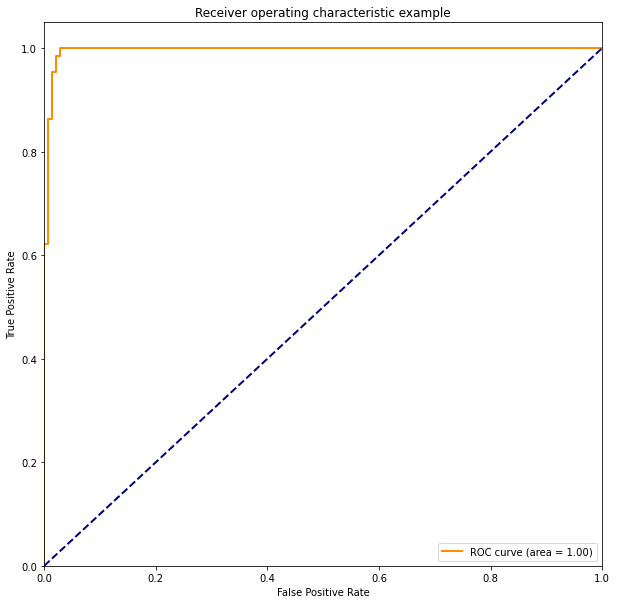

In [62]:
ho_fea_train=ho_fea_train.astype('float64')#留出法进行训练
ho_label_train=ho_label_train.astype('int')#将数据中的unknown格式转化
ho_fea_test=ho_fea_test.astype('float64')
ho_label_test=ho_label_test.astype('int')
ho_LR = LogisticRegression(random_state=0).fit(ho_fea_train, ho_label_train)
LR_value=ho_LR.predict(ho_fea_test).reshape(-1, 1)
LR_proba=ho_LR.predict_proba(ho_fea_test)
LR_confu_matrix=confusion_matrix(ho_label_test,LR_value)
LR_score=precision_score(ho_label_test,LR_value)
LR_recall=recall_score(ho_label_test,LR_value)
LR_f1=f1_score(ho_label_test,LR_value)
print("训练的混淆矩阵为\n%s"%(LR_confu_matrix))
print("训练的查准率与查全率为%f ,%f"%(LR_score, LR_recall))
print("训练的f1值为%f"%(LR_f1))
fpr, tpr, thresholds = metrics.roc_curve(ho_label_test,LR_proba[:,1], pos_label=1)
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

第1次训练的混淆矩阵为
[[74  2]
 [ 7 54]]
第1次训练的查准率与查全率为0.964286 ,0.885246
第1次训练的f1值为0.923077


<Figure size 432x288 with 0 Axes>

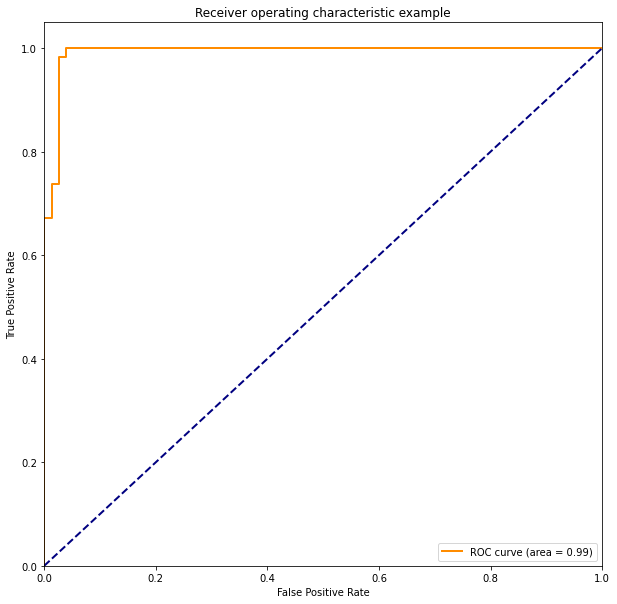

第2次训练的混淆矩阵为
[[67  4]
 [ 3 63]]
第2次训练的查准率与查全率为0.940299 ,0.954545
第2次训练的f1值为0.947368


<Figure size 432x288 with 0 Axes>

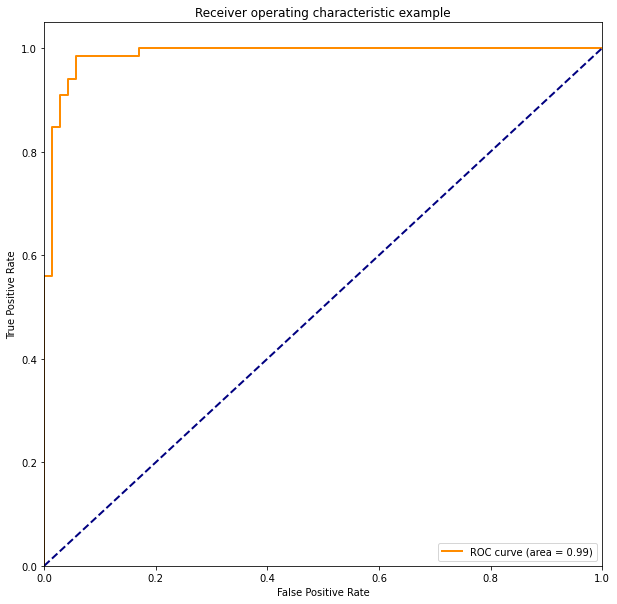

第3次训练的混淆矩阵为
[[87  2]
 [ 2 46]]
第3次训练的查准率与查全率为0.958333 ,0.958333
第3次训练的f1值为0.958333


<Figure size 432x288 with 0 Axes>

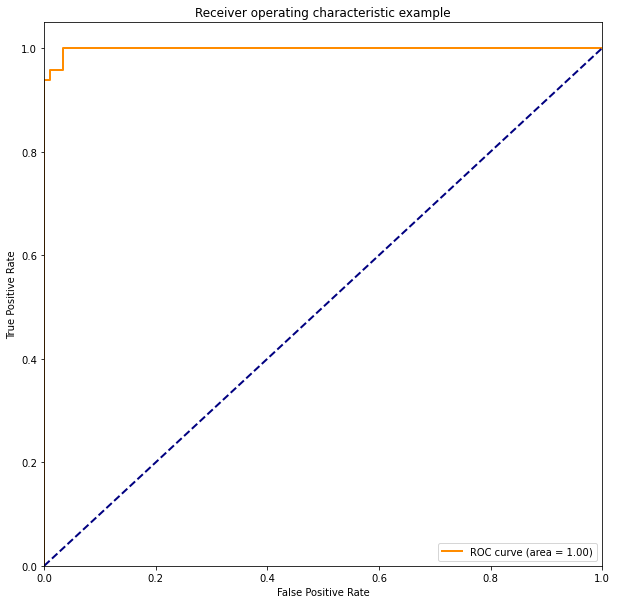

第4次训练的混淆矩阵为
[[105   2]
 [  1  28]]
第4次训练的查准率与查全率为0.933333 ,0.965517
第4次训练的f1值为0.949153


<Figure size 432x288 with 0 Axes>

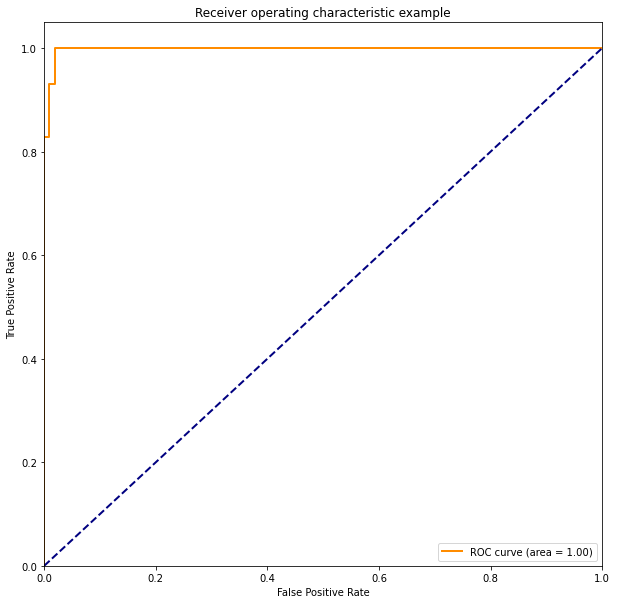

第5次训练的混淆矩阵为
[[101   0]
 [  0  35]]
第5次训练的查准率与查全率为1.000000 ,1.000000
第5次训练的f1值为1.000000


<Figure size 432x288 with 0 Axes>

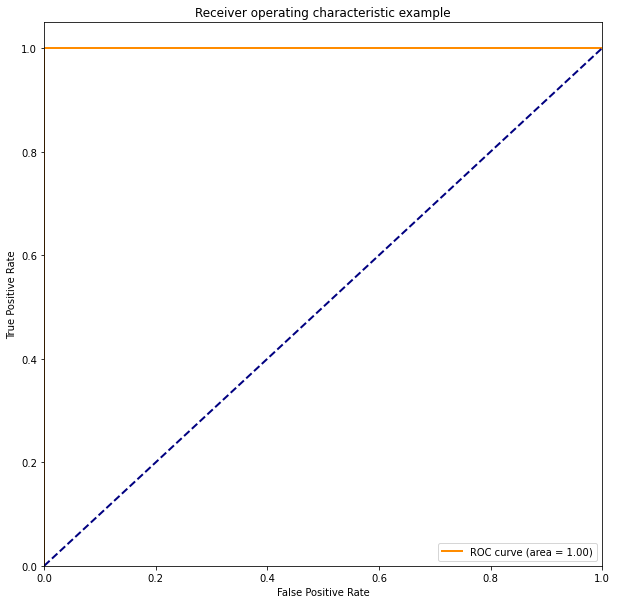

In [58]:
i=1
for kf_train, kf_test in kf.split(dataset):
    kf_feature=dataset.iloc[kf_train,1:10].astype('float64')
    kf_label=dataset.iloc[kf_train,10].astype('int')
    kf_tfeature=dataset.iloc[kf_test,1:10].astype('float64')
    kf_tlabel=np.array(dataset.iloc[kf_test,10].astype('int')).reshape(-1,1)
    kf_LR = LogisticRegression(random_state=0).fit( kf_feature, kf_label)
    LR_value=kf_LR.predict(kf_tfeature).reshape(-1, 1)
    LR_proba=kf_LR.predict_proba(kf_tfeature)
    LR_confu_matrix=confusion_matrix(kf_tlabel,LR_value)
    LR_score=precision_score(kf_tlabel,LR_value)
    LR_recall=recall_score(kf_tlabel,LR_value)
    LR_f1=f1_score(kf_tlabel,LR_value)
    print("第%d次训练的混淆矩阵为\n%s"%(i,LR_confu_matrix))
    print("第%d次训练的查准率与查全率为%f ,%f"%(i,LR_score, LR_recall))
    print("第%d次训练的f1值为%f"%(i,LR_f1))
    fpr, tpr, thresholds = metrics.roc_curve(kf_tlabel,LR_proba[:,1], pos_label=1)
    roc_auc = auc(fpr,tpr) ###计算auc的值
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    i+=1

## 6.2 Decision Tree

训练的混淆矩阵为
[[136   3]
 [  6  60]]
训练的查准率与查全率为0.952381 ,0.909091
训练的f1值为0.930233


<Figure size 432x288 with 0 Axes>

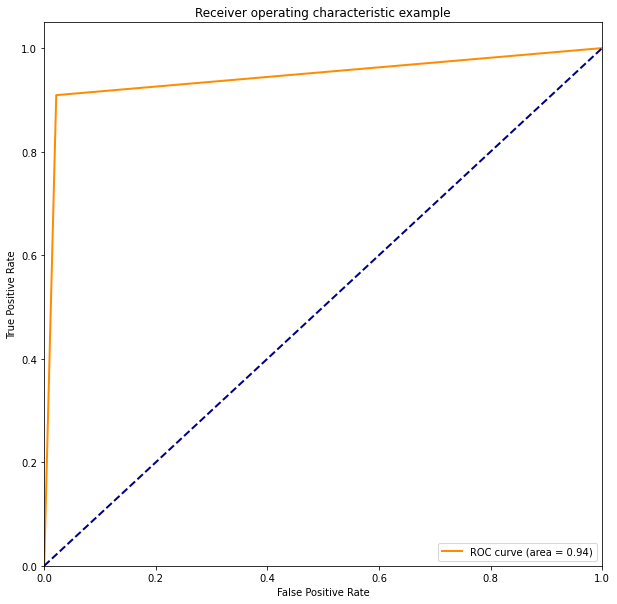

In [76]:
ho_fea_train=ho_fea_train.astype('float32')#留出法进行训练
ho_label_train=ho_label_train.astype('int')#将数据中的unknown格式转化
ho_fea_test=ho_fea_test.astype('float32')
ho_label_test=ho_label_test.astype('int')
ho_DT = DecisionTreeClassifier(random_state=0).fit(ho_fea_train, ho_label_train)
DT_value=ho_DT.predict(ho_fea_test).reshape(-1, 1)
DT_proba=ho_DT.predict_proba(ho_fea_test)
DT_confu_matrix=confusion_matrix(ho_label_test,DT_value)
DT_score=precision_score(ho_label_test,DT_value)
DT_recall=recall_score(ho_label_test,DT_value)
DT_f1=f1_score(ho_label_test,DT_value)
print("训练的混淆矩阵为\n%s"%(DT_confu_matrix))
print("训练的查准率与查全率为%f ,%f"%(DT_score, DT_recall))
print("训练的f1值为%f"%(DT_f1))
fpr, tpr, thresholds = metrics.roc_curve(ho_label_test,DT_proba[:,1], pos_label=1)
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [77]:
print(DT_proba[:,1])

[0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.]


第1次训练的混淆矩阵为
[[74  2]
 [13 48]]
第1次训练的查准率与查全率为0.960000 ,0.786885
第1次训练的f1值为0.864865


<Figure size 432x288 with 0 Axes>

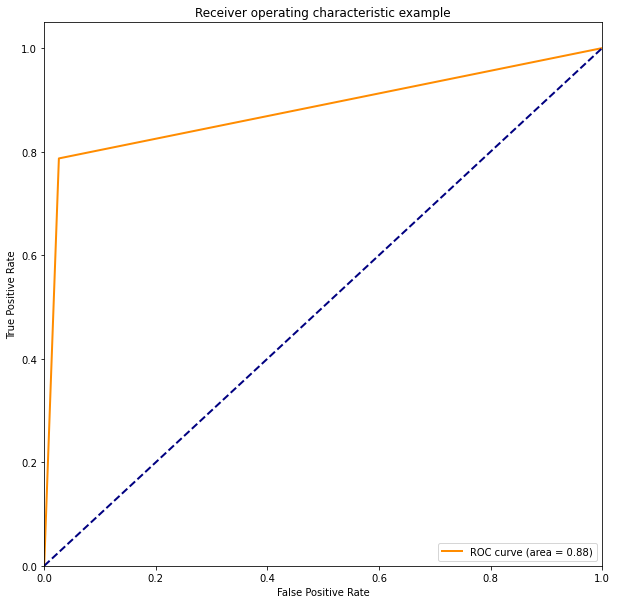

第2次训练的混淆矩阵为
[[67  4]
 [ 3 63]]
第2次训练的查准率与查全率为0.940299 ,0.954545
第2次训练的f1值为0.947368


<Figure size 432x288 with 0 Axes>

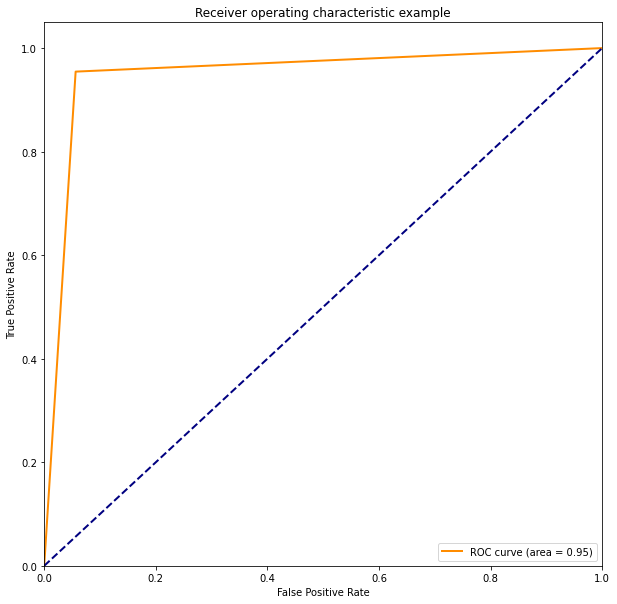

第3次训练的混淆矩阵为
[[83  6]
 [ 5 43]]
第3次训练的查准率与查全率为0.877551 ,0.895833
第3次训练的f1值为0.886598


<Figure size 432x288 with 0 Axes>

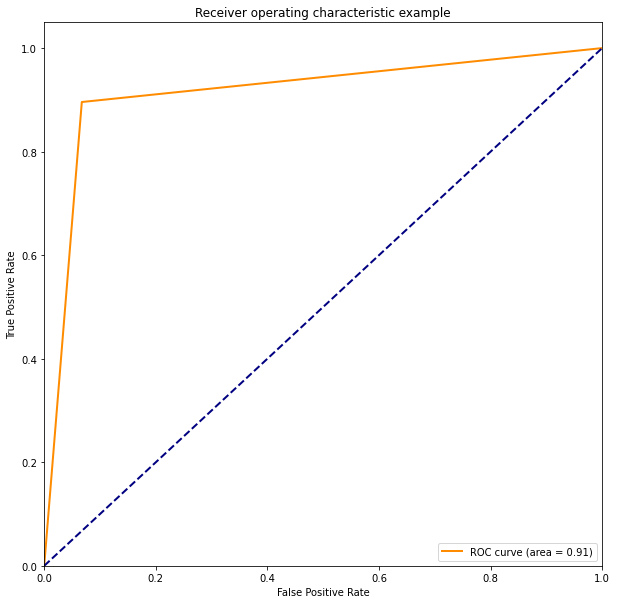

第4次训练的混淆矩阵为
[[103   4]
 [  1  28]]
第4次训练的查准率与查全率为0.875000 ,0.965517
第4次训练的f1值为0.918033


<Figure size 432x288 with 0 Axes>

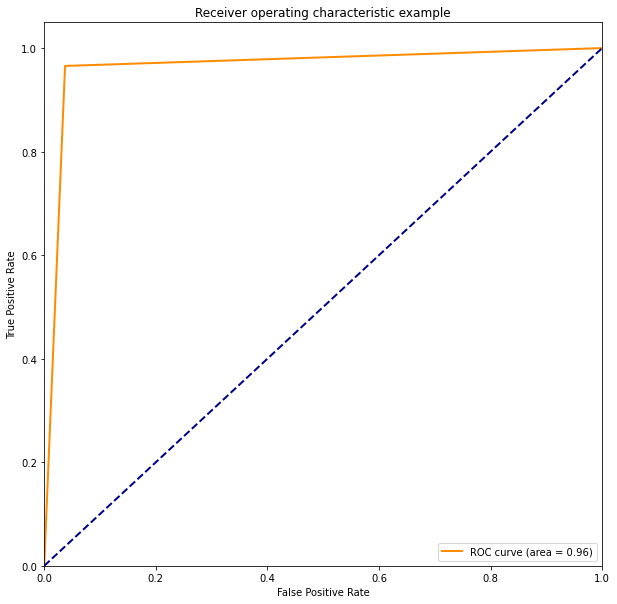

第5次训练的混淆矩阵为
[[99  2]
 [ 4 31]]
第5次训练的查准率与查全率为0.939394 ,0.885714
第5次训练的f1值为0.911765


<Figure size 432x288 with 0 Axes>

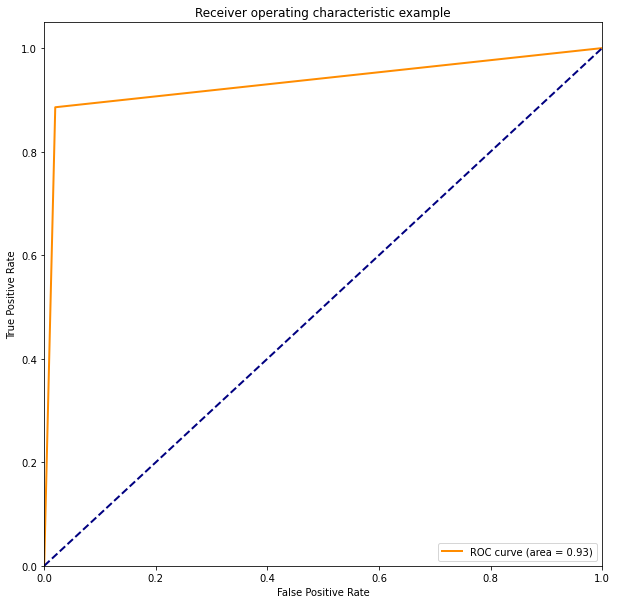

In [78]:
i=1
for kf_train, kf_test in kf.split(dataset):
    kf_feature=dataset.iloc[kf_train,1:10].astype('float64')
    kf_label=dataset.iloc[kf_train,10].astype('int')
    kf_tfeature=dataset.iloc[kf_test,1:10].astype('float64')
    kf_tlabel=np.array(dataset.iloc[kf_test,10].astype('int')).reshape(-1,1)
    kf_DT = DecisionTreeClassifier(random_state=0).fit( kf_feature, kf_label)
    DT_value=kf_DT.predict(kf_tfeature).reshape(-1, 1)
    DT_proba=kf_DT.predict_proba(kf_tfeature)
    DT_confu_matrix=confusion_matrix(kf_tlabel,DT_value)
    DT_score=precision_score(kf_tlabel,DT_value)
    DT_recall=recall_score(kf_tlabel,DT_value)
    DT_f1=f1_score(kf_tlabel,DT_value)
    print("第%d次训练的混淆矩阵为\n%s"%(i,DT_confu_matrix))
    print("第%d次训练的查准率与查全率为%f ,%f"%(i,DT_score, DT_recall))
    print("第%d次训练的f1值为%f"%(i,DT_f1))
    fpr, tpr, thresholds = metrics.roc_curve(kf_tlabel,DT_proba[:,1], pos_label=1)
    roc_auc = auc(fpr,tpr) ###计算auc的值
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    i+=1